In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
all_data = pd.read_csv('stock_data.csv')
# all_data

Create a new dataframe using 20 randomly selected companies

In [4]:
unique_companies = all_data['Name'].unique()
selected_companies = random.sample(unique_companies.tolist(),20)

data = all_data[all_data['Name'].isin(selected_companies)]

data.tail

data.dtypes

Date              object
Code              object
Name              object
12m Low           object
12m High          object
Day Low           object
Day High          object
Day Price         object
Previous          object
Change            object
Change%           object
Volume            object
Adjusted Price    object
dtype: object

DO THE TYPE CONVERSIONS

In [5]:
#Convert to datetime
data.loc[:, 'Date'] = data['Date'].astype('datetime64[ns]')


# Convert to categorical
data.loc[:, 'Name'] = data['Name'].astype('category')
data.loc[:, 'Code'] = data['Code'].astype('category')

# Convert to float
columns_to_convert = ['12m Low', '12m High', 'Day Low', 'Day High', 'Day Price', 'Previous', 'Change', 'Change%', 'Adjusted Price', 'Volume']

for i in columns_to_convert:
    data.loc[:, i] = pd.to_numeric(data[i].astype(str).str.replace(',', ''), errors='coerce')


/tmp/ipykernel_10219/3346842627.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.loc[:, 'Date'] = data['Date'].astype('datetime64[ns]')


In [6]:
#REMOVE THE DASHES IN CHANGE COLUMN AND CALCULATE THE VALUE FOR EMPTY CELLS

#Calculate change for empty values
data.loc[:, 'Change'] = data['Day Price'].astype(float) - data['Previous'].astype(float)

#replace `-` in Change with null
data.loc[:, 'Change'] = data['Change'].replace('-', np.nan)

#Calculate Change% for empty values
data.loc[:, 'Change%'] = (data['Change'] / data['Previous']) * 100
data.head(5)
# data




,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
1,2022-01-03 00:00:00,KUKZ,Kakuzi Plc,355.0,427.0,385.0,385.0,385.0,385.0,0.0,0.0,NaN,NaN
5,2022-01-03 00:00:00,WTK,Williamson Tea Kenya Plc,125.0,154.75,132.0,132.0,132.0,130.0,2.0,1.538462,15000.0,NaN
7,2022-01-03 00:00:00,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.6,11.9,11.75,11.85,-0.1,-0.843882,57700.0,NaN
11,2022-01-03 00:00:00,EQTY,Equity Group Holdings Plc,39.0,55.0,51.0,54.5,52.75,52.75,0.0,0.0,4702000.0,NaN
14,2022-01-03 00:00:00,KCB,KCB Group Plc,37.0,50.75,45.25,46.0,45.55,45.45,0.1,0.220022,174500.0,NaN


HANDLE ALL THE MISSING VALUES

In [7]:
null_counts = data.isnull().sum()
columns_with_null = null_counts[null_counts > 0]

columns_with_null

Volume             730
Adjusted Price    2040
dtype: int64

In [8]:
# Find the indices of the columns you want to replace
volume_index = data.columns.get_loc('Volume')
adjusted_price_index = data.columns.get_loc('Adjusted Price')

# Create a list of column indices to replace
columns_to_replace_indices = [volume_index, adjusted_price_index]

# Select columns to replace using iloc
columns_to_replace = data.iloc[:, columns_to_replace_indices]

# Calculate means
columns_to_replace_means = columns_to_replace.mean()

# Replace NaN values with means
data.iloc[:, columns_to_replace_indices] = columns_to_replace.fillna(columns_to_replace_means)


In [14]:
data.head(10)

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
1,2022-01-03 00:00:00,KUKZ,Kakuzi Plc,355.0,427.0,385.0,385.0,385.0,385.0,0.0,0.0,746520.916031,NaN
5,2022-01-03 00:00:00,WTK,Williamson Tea Kenya Plc,125.0,154.75,132.0,132.0,132.0,130.0,2.0,1.538462,15000.0,NaN
7,2022-01-03 00:00:00,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.6,11.9,11.75,11.85,-0.1,-0.843882,57700.0,NaN
11,2022-01-03 00:00:00,EQTY,Equity Group Holdings Plc,39.0,55.0,51.0,54.5,52.75,52.75,0.0,0.0,4702000.0,NaN
14,2022-01-03 00:00:00,KCB,KCB Group Plc,37.0,50.75,45.25,46.0,45.55,45.45,0.1,0.220022,174500.0,NaN
20,2022-01-03 00:00:00,EVRD,Eveready East Africa Ltd,0.77,1.27,1.04,1.07,1.05,0.98,0.07,7.142857,21200.0,NaN
23,2022-01-03 00:00:00,KQ,Kenya Airways Plc,3.83,3.83,3.83,3.83,3.83,3.83,0.0,0.0,746520.916031,NaN
24,2022-01-03 00:00:00,LKL,Longhorn Publishers Plc,3.26,4.6,3.96,4.0,3.97,4.0,-0.03,-0.75,800.0,NaN
28,2022-01-03 00:00:00,SGL,Standard Group Plc,11.9,20.0,13.55,13.55,13.55,13.55,0.0,0.0,746520.916031,NaN
29,2022-01-03 00:00:00,TPSE,TPS Eastern Africa (Serena) Ltd,10.5,17.0,15.25,15.25,15.25,15.25,0.0,0.0,746520.916031,NaN


In [10]:
data

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
1,2022-01-03 00:00:00,KUKZ,Kakuzi Plc,355.0,427.0,385.0,385.0,385.0,385.0,0.0,0.0,746520.916031,NaN
5,2022-01-03 00:00:00,WTK,Williamson Tea Kenya Plc,125.0,154.75,132.0,132.0,132.0,130.0,2.0,1.538462,15000.0,NaN
7,2022-01-03 00:00:00,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.6,11.9,11.75,11.85,-0.1,-0.843882,57700.0,NaN
11,2022-01-03 00:00:00,EQTY,Equity Group Holdings Plc,39.0,55.0,51.0,54.5,52.75,52.75,0.0,0.0,4702000.0,NaN
14,2022-01-03 00:00:00,KCB,KCB Group Plc,37.0,50.75,45.25,46.0,45.55,45.45,0.1,0.220022,174500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6710,2022-05-31 00:00:00,CIC,CIC Insurance Group Ltd,1.94,3.5,1.96,2.0,1.97,1.98,-0.01,-0.505051,86500.0,NaN
6717,2022-05-31 00:00:00,KURV,Kurwitu Ventures Ltd,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,0.0,0.0,746520.916031,NaN
6723,2022-05-31 00:00:00,CARB,Carbacid Investments Plc,10.1,13.5,11.9,11.95,11.95,11.7,0.25,2.136752,4900.0,NaN
6728,2022-05-31 00:00:00,UNGA,Unga Group Ltd,26.1,36.4,29.0,29.0,29.0,30.0,-1.0,-3.333333,2100.0,NaN


DO THE PREDICTION FOR PARTICULAR COMPANY

Mean Absolute Error for Chosen Company: 0.36201259804840435
Mean Squared Error for Chosen Company: 0.2531436821976124
Root Mean Squared Error for Chosen Company: 0.5031338611121422


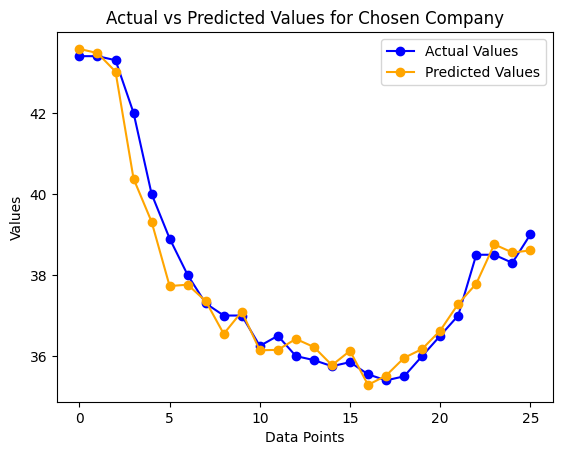

In [16]:



# Step 1: Filter Data for the Chosen Company (e.g., 'EGAD')
chosen_company_code = 'KCB'
chosen_company_data = data[data['Code'] == chosen_company_code]

# Step 2: Prepare Features and Target for the Chosen Company
X_columns_chosen = ['Day Price', 'Change', 'Change%']

# X_columns_chosen = ['12m Low', '12m High', 'Day Low', 'Day High', 'Day Price', 'Previous', 'Change', 'Change%']
y_columns_chosen = ['Day High']
X_chosen = chosen_company_data[X_columns_chosen]
y_chosen = chosen_company_data[y_columns_chosen]

# Step 3: Train-Test Split for the Chosen Company
X_train_chosen, X_test_chosen, y_train_chosen, y_test_chosen = train_test_split(X_chosen, y_chosen, test_size=0.25, random_state=42, shuffle=False)

# Step 4: Train the Linear Regression Model
linear_regressor_chosen = LinearRegression()
linear_regressor_chosen.fit(X_train_chosen, y_train_chosen)
predictions_chosen = linear_regressor_chosen.predict(X_test_chosen)

# Handle NaN values in predictions
predictions_chosen = np.nan_to_num(predictions_chosen, nan=0)  # Replace NaN values with 0

# Handle NaN values in y_test_chosen
y_test_chosen = np.nan_to_num(y_test_chosen, nan=0)  # Replace NaN values with 0

# Evaluate the model
mae_chosen = metrics.mean_absolute_error(y_test_chosen, predictions_chosen)
mse_chosen = metrics.mean_squared_error(y_test_chosen, predictions_chosen)
rmse_chosen = np.sqrt(mse_chosen)
print(f'Mean Absolute Error for Chosen Company: {mae_chosen}')
print(f'Mean Squared Error for Chosen Company: {mse_chosen}')
print(f'Root Mean Squared Error for Chosen Company: {rmse_chosen}')

# Plot Actual vs Predicted Values for the Chosen Company
index_chosen = np.arange(len(y_test_chosen))
plt.plot(index_chosen, y_test_chosen, label='Actual Values', marker='o', linestyle='-', color='blue')
plt.plot(index_chosen, predictions_chosen, label='Predicted Values', marker='o', linestyle='-', color='orange')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values for Chosen Company')
plt.legend()
plt.show()





